<a href="https://colab.research.google.com/github/JoanWaweru/Compiler-Construction-2022/blob/main/Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compiler Construction Group Work**

---



Group Members: 122466, 120374, 121425, 122182

*Lab 1: Definition of Flex, Lex, Byson and Yacc* 

**A) FLEX**

**B) LEX**

**C) BISON**

**D) YACC**


*   YACC (Yet Another Compiler-Compiler) is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. 
*   YACC was initially intended to be used in conjunction with Lex.
*   The rule or grammar is the input to YACC, and the output is a C program.
*   YACC input file is divided into three parts:
    1.   Definition -> includes information about the tokens used in the syntax definition.
    2.   Rules -> contains grammar definition in a modified Backus Normal Form (BNF)
    3.   Auxiliary Routines -> includes function definitions for every function needed in rules part.
*   The output file "file.output" contains the parsing tables. The file "file.tab.h" contains declarations. The parser called the yyparse( ). Parser expects to use a function called yylex() to get tokens. The syntax is as follows:

        def function_name_here(symbol):
          expression = expression token_name term

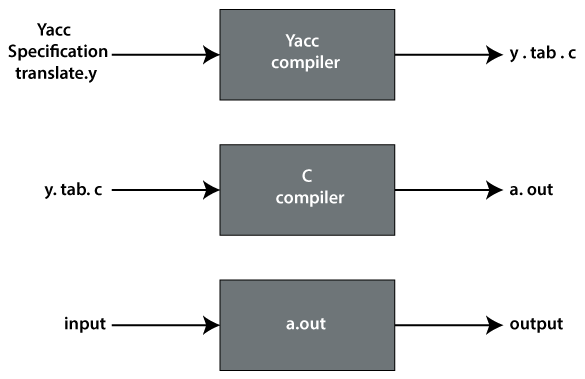

*Yacc Code Snippet*

In [ ]:
%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}
